# <center>**Lab Sheet-1**</center>
# <center>**Neuron Models & Network Architecture**</center>

**Q1. Implement a single artificial neuron in Python from scratch using NumPy.**

In [1]:
import numpy as np

# Inputs and weights
x = np.array([0.5, 0.8])      
w = np.array([0.4, 0.3])      
b = 0.2                       

# Linear combination
z = np.dot(x, w) + b

# Activation (Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

output = sigmoid(z)
print("Neuron output:", output)

Neuron output: 0.6547534606063192


**Q2. Simulate the activation functions: Sigmoid, Tanh, ReLU — plot them.**

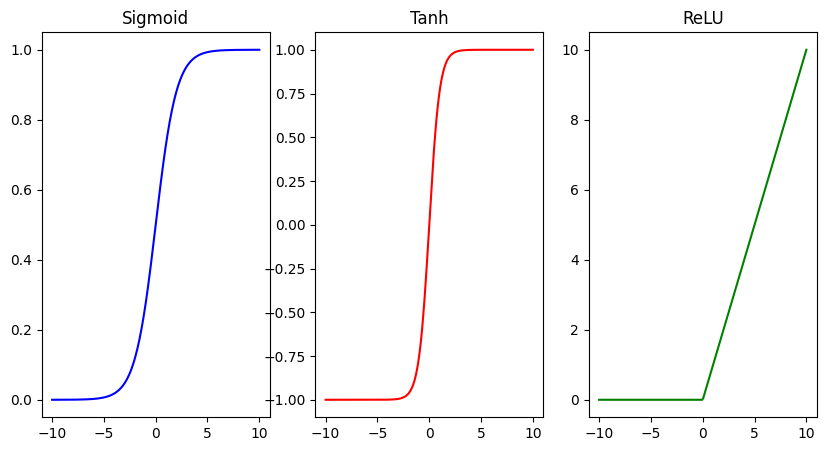

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200)

sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.plot(x, sigmoid, 'b')
plt.title("Sigmoid")

plt.subplot(1,3,2)
plt.plot(x, tanh, 'r')
plt.title("Tanh")

plt.subplot(1,3,3)
plt.plot(x, relu, 'g')
plt.title("ReLU")

plt.show()

**Q3. Build a basic 3-layer feedforward neural network (manually, no ML library).** 

In [3]:
# 3-layer NN: Input(2) → Hidden(3) → Output(1)
np.random.seed(0)

# Input
X = np.array([[0,0],[0,1],[1,0],[1,1]])  # XOR dataset
y = np.array([[0],[1],[1],[0]])

# Weights initialization
W1 = np.random.randn(2,3)
b1 = np.zeros((1,3))
W2 = np.random.randn(3,1)
b2 = np.zeros((1,1))

# Activation
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Forward pass
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a2

output = forward(X)
print("NN output:\n", output)

NN output:
 [[0.58607335]
 [0.66805998]
 [0.6559865 ]
 [0.6779312 ]]


**Q4. Visualize a neural network as a directed graph using networkx or graphviz.** 

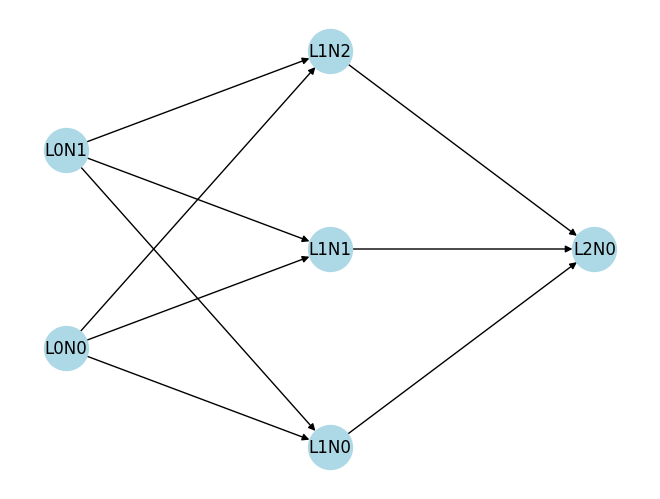

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Layers: Input(2), Hidden(3), Output(1)
layers = [2,3,1]
G = nx.DiGraph()

# Add nodes
node_labels = {}
cnt = 0
for i, size in enumerate(layers):
    for j in range(size):
        G.add_node(cnt, layer=i)
        node_labels[cnt] = f"L{i}N{j}"
        cnt += 1

# Add edges (fully connected)
for u, data in G.nodes(data=True):
    for v, data2 in G.nodes(data=True):
        if data['layer']+1 == data2['layer']:
            G.add_edge(u, v)

# Draw
pos = nx.multipartite_layout(G, subset_key="layer")
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color="lightblue")
plt.show()

**Q5. Implement and demonstrate binary classification using the perceptron learning rule.**

In [5]:
# Perceptron for OR gate
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,1])

# Initialize weights
w = np.zeros(X.shape[1])
b = 0
lr = 0.1
epochs = 10

def step(x):
    return np.where(x>=0,1,0)

# Training
for _ in range(epochs):
    for xi, target in zip(X,y):
        z = np.dot(xi,w) + b
        y_pred = step(z)
        w += lr * (target-y_pred) * xi
        b += lr * (target-y_pred)

print("Final weights:", w, "Bias:", b)

# Testing
for xi in X:
    print(f"Input {xi} → Output {step(np.dot(xi,w)+b)}")

Final weights: [0.1 0.1] Bias: -0.1
Input [0 0] → Output 0
Input [0 1] → Output 1
Input [1 0] → Output 1
Input [1 1] → Output 1
